In [18]:
# COMP257 Assignment 4
# Author: Young Park
# ID: 301200413


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_olivetti_faces

# Load the data
data = fetch_olivetti_faces()
X = data.data
y = data.target

In [19]:
X.shape

(400, 4096)

In [20]:
# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
# (1) Use PCA preserving 99% of the variance to reduce the dataset’s dimensionality.
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, whiten=True)
X_pca = pca.fit_transform(X)

In [22]:
X_pca.shape

(400, 260)

In [23]:
# (2) Determine the most suitable covariance_type for the dataset.
from sklearn.mixture import GaussianMixture

covariance_types = ['full', 'tied', 'diag', 'spherical']
for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=10, covariance_type=cov_type, random_state=13)
    gmm.fit(X_pca)
    print('covariance_type: ', cov_type)
    print('AIC: ', gmm.aic(X_pca))
    print('BIC: ', gmm.bic(X_pca))
    print('')

covariance_type:  full
AIC:  794410.1157051158
BIC:  2159127.767542259

covariance_type:  tied
AIC:  360018.7910254998
BIC:  505862.9141122784

covariance_type:  diag
AIC:  279675.18387995847
BIC:  300466.7227058439

covariance_type:  spherical
AIC:  278027.6402377992
BIC:  288481.285886675



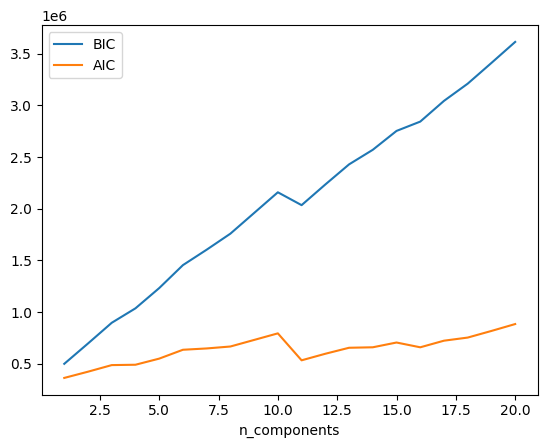

In [24]:
# (3) Determine the minimum number of clusters that best represent the dataset using either AIC or BIC.
# (4) Plot the results from (2) and (3).
'''
How do I choose between AIC and BIC?
AIC is best for prediction as it is asymptotically equivalent to cross-validation.
BIC is best for explanation as it is allows consistent estimation of the underlying data generating process.
'''

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=13).fit(X_pca) for n in n_components]
plt.plot(n_components, [m.bic(X_pca) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_pca) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');
plt.show()

In [25]:
# print best number of clusters for AIC
aic = [m.aic(X_pca) for m in models]
print('Best number of clusters for AIC: ', aic.index(min(aic)) + 1)


Best number of clusters for AIC:  1


In [26]:
# (5) Output the hard clustering for each instance. (kmeans)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=13)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
y_kmeans

array([2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 3, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [27]:
# (6) Output the soft clustering for each instance. (gmm)
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=13)
gmm.fit(X_pca)
y_gmm = gmm.predict(X_pca)
y_gmm

array([2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 2, 2, 2, 2, 2, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 5, 2, 5, 2, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 3, 2, 2, 2, 2, 7, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

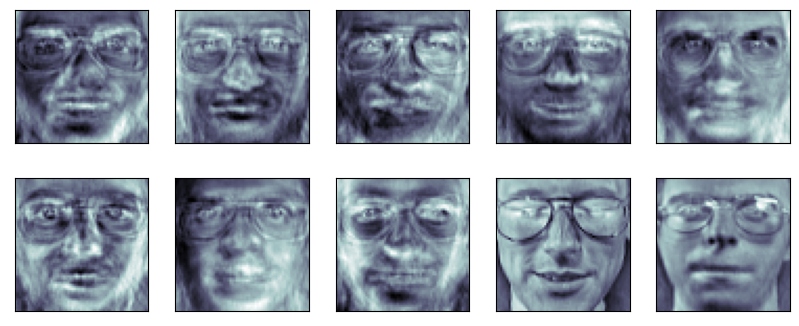

In [28]:
# (7) Use the model to generate some new faces (using the sample() method), and visualize them (use the inverse_transform() method to transform the data back to its original space based on the PCA method used).

# Generate new faces
X_new = gmm.sample(10) # (n_samples, n_features)

# Inverse transform the data back to its original space based on the PCA method used.
X_new = pca.inverse_transform(X_new[0]) # (n_samples, n_features)
X_new = X_new.reshape((10, 64, 64)) # (10, 64, 64) # 10 new faces, 64x64 pixels


# Visualize the new faces
fig, ax = plt.subplots(2, 5, figsize=(10, 4), subplot_kw={'xticks':(), 'yticks':()}) # 2 rows, 5 columns
for i, axi in enumerate(ax.flat):
    axi.imshow(X_new[i], cmap='bone') # cmap='bone' is for grayscale
plt.show() # 10 new faces


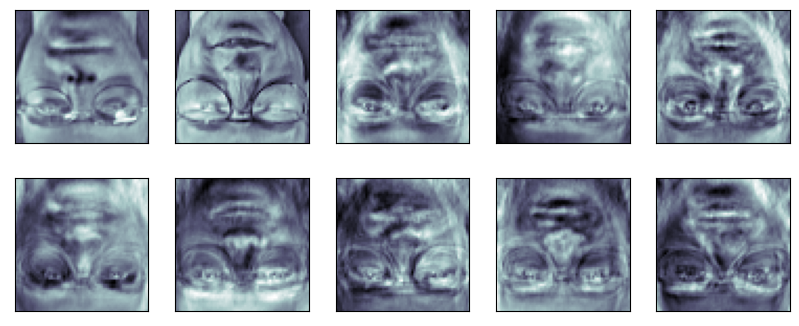

In [29]:
# (8) Modify some images (e.g., rotate, flip, darken).

# Rotate the images
from scipy import ndimage
X_rotated = ndimage.rotate(X_new.copy(), 180, reshape=False)
X_rotated.shape 

# Plot the rotated images
fig, ax = plt.subplots(2, 5, figsize=(10, 4), subplot_kw={'xticks':(), 'yticks':()}) # 2 rows, 5 columns
for i, axi in enumerate(ax.flat):
    axi.imshow(X_rotated[i].reshape(64, 64), cmap='bone') # cmap='bone' is for grayscale
plt.show() # 10 rotated faces

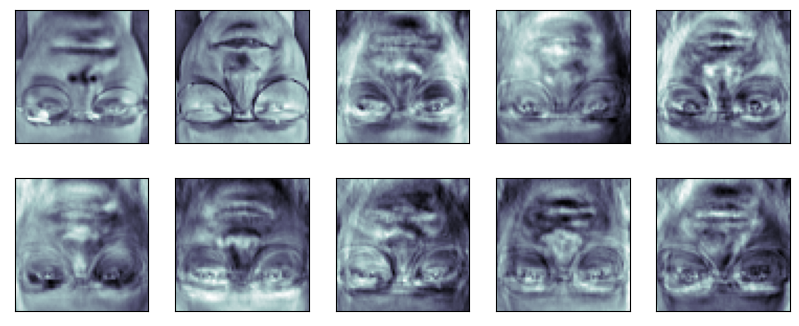

In [30]:
# Flip the images
X_flipped = np.flip(X_new.copy()) # flip left to right
X_flipped.shape 

# Plot the flipped images
fig, ax = plt.subplots(2, 5, figsize=(10, 4), subplot_kw={'xticks':(), 'yticks':()}) # 2 rows, 5 columns
for i, axi in enumerate(ax.flat):
    axi.imshow(X_flipped[i].reshape(64, 64), cmap='bone') # cmap='bone' is for grayscale
plt.show() # 10 flipped faces

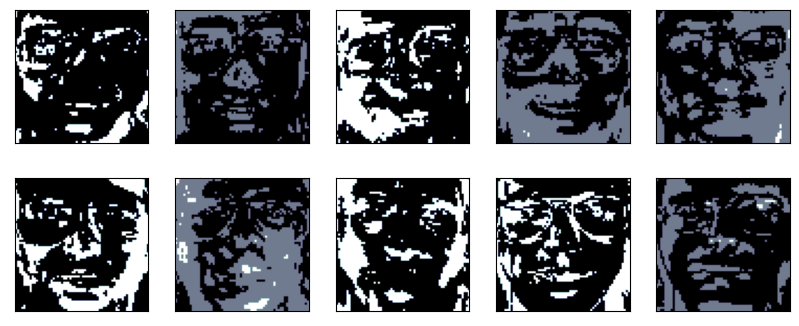

In [31]:
# darken the images
import cv2
X_darkened = X_new.copy()
X_darkened = cv2.convertScaleAbs(X_darkened, alpha=0.5, beta=0) # alpha: contrast, beta: brightness
X_darkened.shape

# Plot the darkened images
fig, ax = plt.subplots(2, 5, figsize=(10, 4), subplot_kw={'xticks':(), 'yticks':()}) # 2 rows, 5 columns
for i, axi in enumerate(ax.flat):
    axi.imshow(X_darkened[i].reshape(64, 64), cmap='bone') # cmap='bone' is for grayscale
plt.show() # 10 darkened faces

In [32]:
# (9) Determine if the model can detect the anomalies produced in (8) by comparing the output of the score_samples() method for normal images and for anomalies

# reshape and combine normal and modified images
# reshape modified images to match the shape of the normal images
X_rotated = X_rotated.reshape(10, 4096) # (10, 4096) # 10 rotated faces, 64x64 pixels
X_flipped = X_flipped.reshape(10, 4096) # (10, 4096) # 10 flipped faces, 64x64 pixels
X_darkened = X_darkened.reshape(10, 4096) # (10, 4096) # 10 dark faces, 64x64 pixels
X_modified = np.concatenate((X_rotated, X_flipped, X_darkened)) # (30, 4096) # 30 modified faces, 64x64 pixels


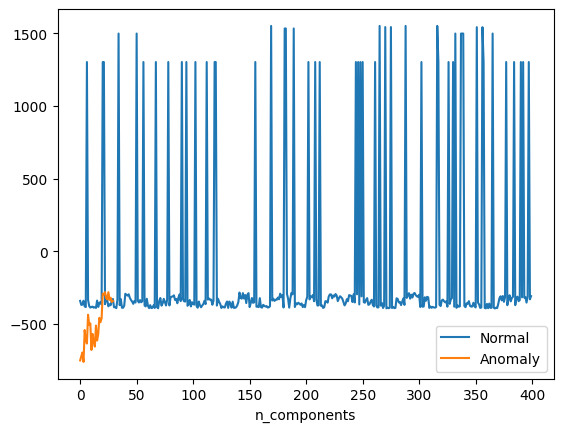

In [33]:
# Output the score_samples() method for normal images and for anomalies

# score_samples() method for normal images (X)
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=13) # 10 clusters, full covariance matrix, random_state=13
gmm.fit(X_pca) # fit the model to the data
X_score = gmm.score_samples(X_pca) # output the score_samples() method for normal images (X) # (1348,) # 1348 scores

# score_samples() method for anomalies (X_modified) GaussianMixture is expecting 260 features as input. However, X_modified has 30 features. Therefore, we need to use PCA to reduce the dimensionality of X_modified to 260 features.
X_modified_pca = pca.transform(X_modified) # (30, 260) # 30 modified faces, 260 features
X_modified_score = gmm.score_samples(X_modified_pca) # output the score_samples() method for anomalies (X_modified) # (30,) # 30 scores

# Plot the scores for normal images and for anomalies
plt.plot(X_score, label='Normal') # plot the scores for normal images
plt.plot(X_modified_score, label='Anomaly') # plot the scores for anomalies
plt.legend(loc='best') # show the legend
plt.xlabel('n_components'); # label the x-axis
plt.show() # 1348 normal scores and 30 anomaly scores
